In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
twoyeardat = pd.read_csv('/content/compas-scores-two-years.csv')
twoyeardat.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,8/14/2013,Male,4/18/1947,69,Greater than 45,Other,...,1,Low,8/14/2013,7/7/2014,7/14/2014,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,1/27/2013,Male,1/22/1982,34,25 - 45,African-American,...,1,Low,1/27/2013,1/26/2013,2/5/2013,0,9,159,1,1
2,4,ed philo,ed,philo,4/14/2013,Male,5/14/1991,24,Less than 25,African-American,...,3,Low,4/14/2013,6/16/2013,6/16/2013,4,0,63,0,1
3,5,marcu brown,marcu,brown,1/13/2013,Male,1/21/1993,23,Less than 25,African-American,...,6,Medium,1/13/2013,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,3/26/2013,Male,1/22/1973,43,25 - 45,Other,...,1,Low,3/26/2013,NaN,NaN,2,0,1102,0,0


In [ ]:
compasdat = pd.read_csv("/content/compas-scores-raw.csv")
compasdat.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/5/1992,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,9/16/1984,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [ ]:
# Change first and last name to have a uniform format
# Make name column to merge the two datasets

first = compasdat["FirstName"].str.lower() # makes the first name column lowercase
last = compasdat["LastName"].str.lower() # makes the first name column lowercase

fullname = first + " " + last # variable to build a name
compasdat["name"] = fullname # adds a new column that sets it equal to the full name

In [ ]:
filtered_compas = compasdat[['name', 'LastName', "FirstName", "MaritalStatus", "DisplayText","DecileScore"]]
filtered_compas.head() # subset for the columns of interest in the first dataset

,name,LastName,FirstName,MaritalStatus,DisplayText,DecileScore
0,kevin fisher,Fisher,Kevin,Single,Risk of Violence,4
1,kevin fisher,Fisher,Kevin,Single,Risk of Recidivism,2
2,kevin fisher,Fisher,Kevin,Single,Risk of Failure to Appear,1
3,kevin kendall,KENDALL,KEVIN,Married,Risk of Violence,2
4,kevin kendall,KENDALL,KEVIN,Married,Risk of Recidivism,1


In [ ]:
filtered_twoyear = twoyeardat[["name","sex", "age","race","decile_score","is_recid"]]
filtered_twoyear.head() # subsets for columns of interst in second dataset

,name,sex,age,race,decile_score,is_recid
0,miguel hernandez,Male,69,Other,1,0
1,kevon dixon,Male,34,African-American,3,1
2,ed philo,Male,24,African-American,4,1
3,marcu brown,Male,23,African-American,8,0
4,bouthy pierrelouis,Male,43,Other,1,0


In [ ]:
# merges the two datasets on name
total_data = pd.merge(filtered_compas, filtered_twoyear, on="name",how='inner')
total_data.head()

,name,LastName,FirstName,MaritalStatus,DisplayText,DecileScore,sex,age,race,decile_score,is_recid
0,kevin kendall,KENDALL,KEVIN,Married,Risk of Violence,2,Male,31,Caucasian,1,0
1,kevin kendall,KENDALL,KEVIN,Married,Risk of Recidivism,1,Male,31,Caucasian,1,0
2,kevin kendall,KENDALL,KEVIN,Married,Risk of Failure to Appear,3,Male,31,Caucasian,1,0
3,daniel dayes,DAYES,DANIEL,Single,Risk of Violence,8,Male,21,African-American,8,1
4,daniel dayes,DAYES,DANIEL,Single,Risk of Recidivism,8,Male,21,African-American,8,1


In [ ]:
# subsets for all records at risk for recidivism
recidivism = total_data.loc[total_data['DisplayText']=='Risk of Recidivism']
recidivism.head()

,name,LastName,FirstName,MaritalStatus,DisplayText,DecileScore,sex,age,race,decile_score,is_recid
1,kevin kendall,KENDALL,KEVIN,Married,Risk of Recidivism,1,Male,31,Caucasian,1,0
4,daniel dayes,DAYES,DANIEL,Single,Risk of Recidivism,8,Male,21,African-American,8,1
7,mikerlie debe,Debe,Mikerlie,Significant Other,Risk of Recidivism,6,Female,21,African-American,6,0
10,stephanie mclaurin,McLaurin,Stephanie,Single,Risk of Recidivism,2,Female,30,African-American,2,0
13,terrance holland,Holland,Terrance,Single,Risk of Recidivism,10,Male,32,Hispanic,10,0


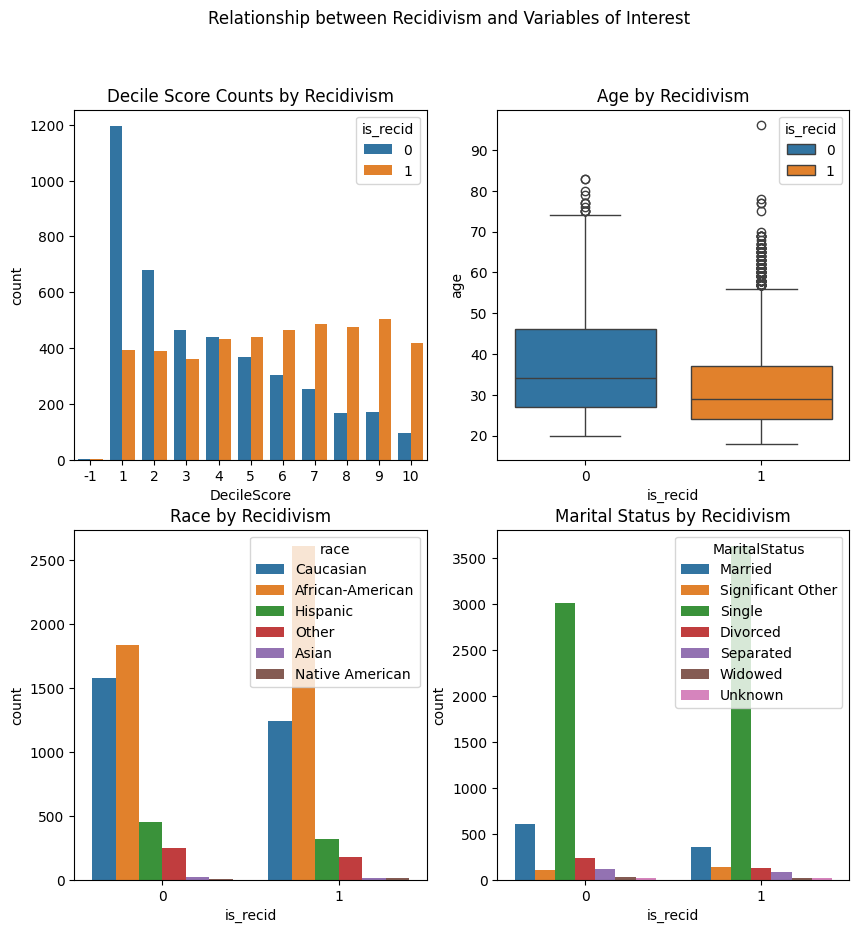

In [ ]:
# ANALYSIS

# Exploratory data analysis

# Relationships between variables of interest and dependent variable
fig,ax = plt.subplots(2,2,figsize=(10,10))

fig.suptitle('Relationship between Recidivism and Variables of Interest')

sns.countplot(ax=ax[0,0],data=recidivism,x='DecileScore',hue='is_recid')
ax[0,0].set_title('Decile Score Counts by Recidivism')

sns.boxplot(ax=ax[0,1],data=recidivism,x='is_recid',hue='is_recid',y='age')
ax[0,1].set_title('Age by Recidivism')

sns.countplot(ax=ax[1,0],data=recidivism,x='is_recid',hue='race')
ax[1,0].set_title('Race by Recidivism')

sns.countplot(ax=ax[1,1],data=recidivism,x='is_recid',hue='MaritalStatus')
ax[1,1].set_title('Marital Status by Recidivism')

plt.show()

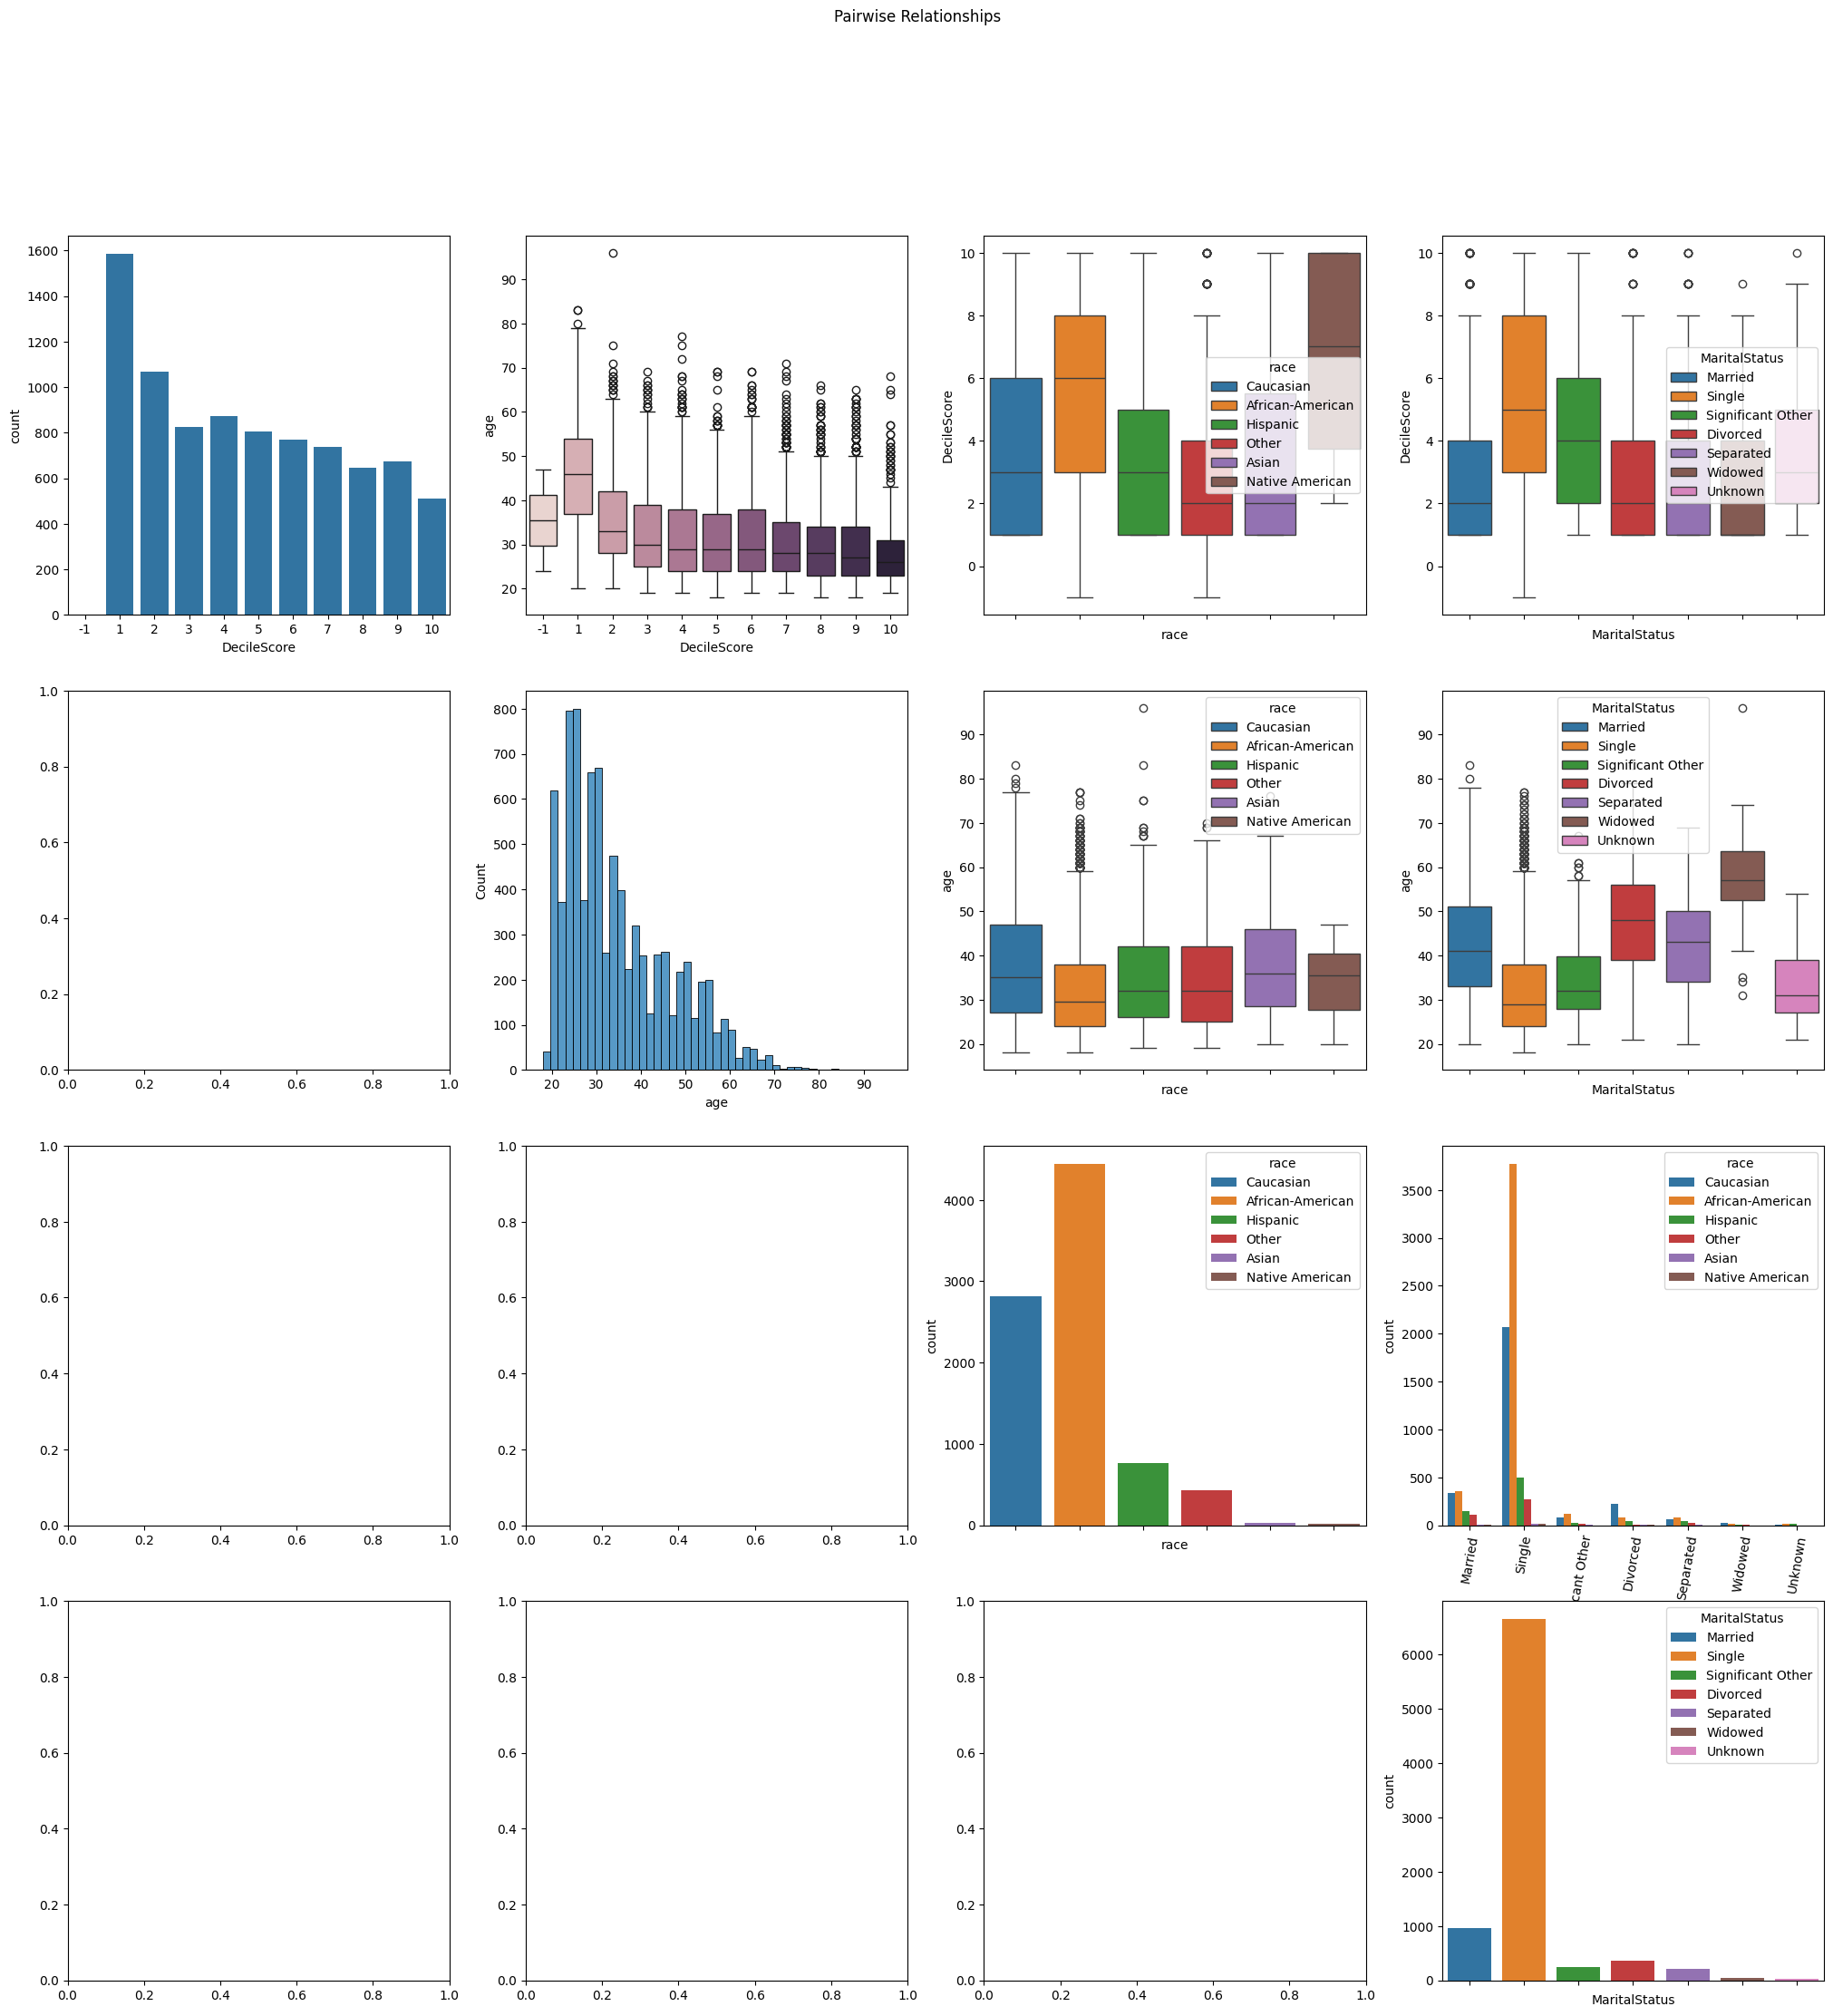

In [ ]:
# Pairwise relationships with independent variables

fig,ax = plt.subplots(4,4,figsize=(25,25))

fig.suptitle('Pairwise Relationships')

sns.countplot(ax=ax[0,0],data=recidivism,x='DecileScore')

sns.boxplot(ax=ax[0,1],data=recidivism,x='DecileScore',y='age',hue='DecileScore',legend=False)

sns.boxplot(ax=ax[0,2],data=recidivism,x='race',y='DecileScore',hue='race',legend='full')
ax[0,2].set(xticklabels=[])

sns.boxplot(ax=ax[0,3],data=recidivism,x='MaritalStatus',y='DecileScore',hue='MaritalStatus',legend='full')
ax[0,3].set(xticklabels=[])

sns.histplot(ax=ax[1,1],data=recidivism,x='age')

sns.boxplot(ax=ax[1,2],data=recidivism,x='race',y='age',hue='race',legend='full')
ax[1,2].set(xticklabels=[])

sns.countplot(ax=ax[2,2],data=recidivism,x='race',hue='race',legend='full')
ax[2,2].set(xticklabels=[])

sns.countplot(ax=ax[3,3],data=recidivism,x='MaritalStatus',hue='MaritalStatus',legend='full')
ax[3,3].set(xticklabels=[])

sns.boxplot(ax=ax[1,3],data=recidivism,x='MaritalStatus',y='age',hue='MaritalStatus',legend='full')
ax[1,3].set(xticklabels=[])

sns.countplot(ax=ax[2,3],data=recidivism,x='MaritalStatus',hue='race',legend='full')
ax[2,3].tick_params(axis='x',labelrotation=80)

plt.show()

In [ ]:
# BUILDING OF DEMOGRAPHIC DATA CLASSIFICATION MODEL

# subset for the variables of interest

all_df = recidivism[["is_recid","DecileScore","race", "MaritalStatus","age"]]

In [ ]:
# First, need to transform categorical data into dummy variables to input into logistical regression model

race = pd.get_dummies(all_df["race"], drop_first=True) # builds dummy variables for each race
maritalStatus = pd.get_dummies(all_df["MaritalStatus"], drop_first=True) # builds dummy variables for each marital status

In [ ]:
# drops the original categorical columns because they have been transformed by the dummy variables
all_df = all_df.drop(columns=["race","MaritalStatus"])
all_df.head()

,is_recid,DecileScore,age
1,0,1,31
4,1,8,21
7,0,6,21
10,0,2,30
13,0,10,32


In [ ]:
# adds dummy variables back into the filtered dataframe
all_df = pd.concat([all_df,race, maritalStatus], axis=1)
all_df.head()

,is_recid,DecileScore,age,Asian,Caucasian,Hispanic,Native American,Other,Married,Separated,Significant Other,Single,Unknown,Widowed
1,0,1,31,0,1,0,0,0,1,0,0,0,0,0
4,1,8,21,0,0,0,0,0,0,0,0,1,0,0
7,0,6,21,0,0,0,0,0,0,0,1,0,0,0
10,0,2,30,0,0,0,0,0,0,0,0,1,0,0
13,0,10,32,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
X = all_df.iloc[:,1:] # sets our X value to all of the independent variables of the model
y = all_df.iloc[:, 0] # sets our y value to the dependent variable to be predicted

In [ ]:
from sklearn.preprocessing import StandardScaler
# normalize unit values
sc = StandardScaler() # sets sc to the scaler
X = sc.fit_transform(X) # normalizes and scales the data

In [ ]:
from sklearn.model_selection import train_test_split

# seperate the variables into training data (70% of rows) and testing data (30% of rows)
# random_state shuffles the data once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
all_model = LogisticRegression() # sets up logistic regression model
all_model.fit(X_train, y_train) # trains the model using the data

y_pred = all_model.predict(X_test) # tests the testing data through the model

In [ ]:
# a printed out dataframe comparing the actual values to the predicted values for the first 5 rows
comparison = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
comparison.head()

,Actual,Predicted
9880,1,1
11974,0,0
20902,0,1
17908,0,1
14512,1,0


In [ ]:
allCoeffcient = all_model.coef_ # coefficients of each feature in the model
allIntercept = all_model.intercept_ # finds intercept of the model

print("Coefficents")
print("-----------")
print(f"Decile Score: {allCoeffcient[0][0]: .2f}")
print(f"Age: {allCoeffcient[0][1]: .2f}")
print(f"Asian: {allCoeffcient[0][2]: .2f}")
print(f"Caucasian: {allCoeffcient[0][3]: .2f}")
print(f"Hispanic: {allCoeffcient[0][4]: .2f}")
print(f"Native American: {allCoeffcient[0][5]: .2f}")
print(f"Other Race: {allCoeffcient[0][6]: .2f}")
print(f"Married: {allCoeffcient[0][7]: .2f}")
print(f"Seperated: {allCoeffcient[0][7]: .2f}")
print(f"Significant Other: {allCoeffcient[0][9]: .2f}")
print(f"Single: {allCoeffcient[0][10]: .2f}")
print(f"Unknown: {allCoeffcient[0][11]: .2f}")
print(f"Widowed: {allCoeffcient[0][12]: .2f}")

print(f"\nIntercept:\n---------\n{allIntercept[0]:.2f}")

Coefficents
-----------
Decile Score:  0.68
Age: -0.19
Asian: -0.02
Caucasian: -0.10
Hispanic: -0.07
Native American:  0.02
Other Race: -0.04
Married:  0.01
Seperated:  0.01
Significant Other:  0.03
Single: -0.00
Unknown:  0.03
Widowed:  0.04

Intercept:
---------
0.07


In [ ]:
from sklearn.metrics import confusion_matrix
# makes a confusion matrix to count true positives, true negatives, false positives, and false negatives
cf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predicted Values')

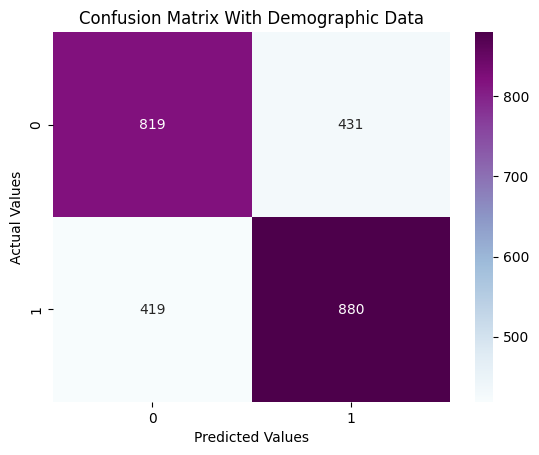

In [ ]:
# build a heat map to better visualize confusion matrix values
ax = sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="BuPu" ,fmt='g')
ax.set_title('Confusion Matrix With Demographic Data')
ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')

In [ ]:
accuracy = ((819 + 880) / (819 + 880 + 419 + 431)*100)
# taken from confusion matrix
print(f"Model is {accuracy:.2f}% accurate.")

Model is 66.65% accurate.


In [ ]:
# CREATION OF LOGISTIC REGRESSION MODEL THAT ISOLATES DECILE SCORE

decile_df = recidivism[["is_recid", "DecileScore"]] # subsetting for model which does not consider demographic factors

In [ ]:
X2 = decile_df.iloc[:,1] # sets our X value to all of the independent variables of the model
y2 = decile_df.iloc[:, 0] # sets our y value to the dependent variable to be predicted

In [ ]:
from sklearn.preprocessing import StandardScaler
# normalizes unit values so they are all to scale
sc = StandardScaler() # sets sc to the scaler
X2 = np.array(X2).reshape(-1, 1) # reshapes it so it can be fitted
X2 = sc.fit_transform(X2) # normalizes the data

In [ ]:
from sklearn.model_selection import train_test_split

# this seperates the variables into our training data and our test data which is 30% of the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=1)

In [ ]:
decile_model = LogisticRegression() # sets model as a logistic regression model
decile_model.fit(X_train2, y_train2) # trains the data

y_pred2 = decile_model.predict(X_test2) # tests the remainder of the data

In [ ]:
# a printed out dataframe comparing the actual values to the predicted values for the first 5 rows
comparison2 = pd.DataFrame({'Actual' : y_test2, 'Predicted' : y_pred2})
comparison2.head(5)

,Actual,Predicted
9880,1,1
11974,0,0
20902,0,1
17908,0,1
14512,1,0


In [ ]:
decileCoeffcient = decile_model.coef_ # coefficients of the model
decileIntercept = decile_model.intercept_ # finds intercept of the model

print(f'Decile Score Coefficient: {decileCoeffcient[0][0]:.2f}')
print(f'Intercept: {decileIntercept[0]:.2f}')

Decile Score Coefficient: 0.77
Intercept: 0.08


In [ ]:
from sklearn.metrics import confusion_matrix

# makes a confusion matrix to count type I and type II errors which are on bottom left and top right
cf_matrix2 = confusion_matrix(y_test2, y_pred2)

Text(0.5, 23.52222222222222, 'Predicted Values')

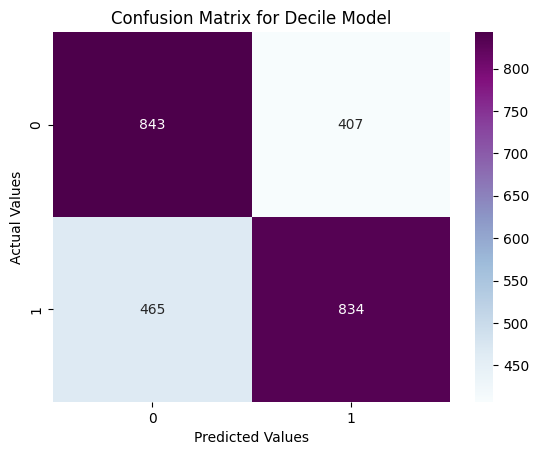

In [ ]:
# build a heat map to better visualize confusion matrix values
ax = sns.heatmap(pd.DataFrame(cf_matrix2), annot=True, cmap="BuPu", fmt='g')
ax.set_title('Confusion Matrix for Decile Model')
ax.set_ylabel('Actual Values')
ax.set_xlabel('Predicted Values')

In [ ]:
accuracy = ((843 + 834) / (843 + 834 + 465 + 407)*100)
# taken from confusion matrix
print(f"Model is {accuracy:.2f}% accurate.")

Model is 65.79% accurate.
